In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model
import string
import os

In [2]:
# !pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]

True

In [3]:
file="Reviews.csv"
import pandas as pd
df= pd.read_csv(file)
print(df.shape)

C:\Users\hkmeh\AppData\Local\Temp\ipykernel_15696\3228912811.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file)


(334119, 31)


In [4]:
df.head()

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


df = df.dropna(how='any',axis=0) 
df.to_csv('updated_100000.csv')

In [5]:
df.loc[1:10, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [6]:
df['ratings_overall'].value_counts()

ratings_overall
1    127409
5     94199
4     39330
3     39315
2     33866
Name: count, dtype: int64

In [7]:
df['ratings_overall'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [8]:
df.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

In [9]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Text preprocessing

In [10]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
    return text

In [11]:
df['text']=df['text'].apply(clean_text)

In [12]:
df.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

In [13]:
df.iloc[0]

Unnamed: 0                                                                   0
ï»¿                                                                          0
uuid                                      68e8f769-a0f0-460c-bfb9-16662fcc1e17
createdAt                                                 2023-11-02T06:48:08Z
updatedAt                                                 2023-11-02T06:48:08Z
text                                                     too much small amount
isAnonymous                                                              False
reviewerName                                                              MOON
reviewerId                                                            bdaclwhn
ratings_overall                                                              2
labels                                                                       1
ratings                      [{'topic': 'overall', 'score': 2}, {'topic': '...
type                                                

In [14]:
def get_summary(df):   

    content = df["text"].values        
    word_tok = [word.lower() for item in content for word in nltk.word_tokenize(item)]    
    st_words = set(word_tok)   
    
    fact = {
        "TotalCount": len(content),
        "TotalWords": len(word_tok),        
        "TotalUniqueWords": len(st_words),
        "MeanWordsPerTweet": len(word_tok) / len(content),
    }

    return fact, df.describe()

In [15]:
f, s = get_summary(df)
s

,Unnamed: 0,ï»¿,ratings_overall,labels,likeCount,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000
mean,167059.000000,168411.559947,2.817562,1.916958,0.241884,23.668077,90.623229,127.527136,4014.909981,3.841418
std,96451.991633,96817.799309,1.684886,0.935649,0.629411,0.528833,0.528335,54.243513,5812.797803,0.445709
min,0.000000,0.000000,1.000000,1.000000,-2.000000,22.269991,90.210323,0.000000,0.000000,0.000000
25%,83529.500000,84763.500000,1.000000,1.000000,0.000000,23.741879,90.371986,85.000000,488.000000,3.600000
50%,167059.000000,168499.000000,3.000000,2.000000,0.000000,23.773776,90.405709,86.000000,1584.000000,3.900000
75%,250588.500000,252235.500000,5.000000,3.000000,0.000000,23.810406,90.425728,193.000000,4697.000000,4.100000
max,334118.000000,335947.000000,5.000000,3.000000,51.000000,24.919806,91.910593,249.000000,32993.000000,5.000000


In [16]:
f

{'TotalCount': 334119,
 'TotalWords': 3670563,
 'TotalUniqueWords': 47276,
 'MeanWordsPerTweet': 10.985795480053515}

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(df['text'])

In [18]:
bag=vect.fit_transform(doc)

In [19]:
print(vect.vocabulary_)

{'too': 43554, 'much': 28883, 'small': 39646, 'amount': 1562, 'very': 45311, 'in': 19783, 'food': 15785, 'average': 2696, 'but': 6495, 'their': 42683, 'desert': 11299, 'booter': 5644, 'halwa': 18133, 'and': 1635, 'pudding': 34944, 'is': 20228, 'good': 17323, 'fresh': 16137, 'tasty': 42025, 'everything': 14417, 'ordered': 31374, 'was': 45952, 'kalo': 22188, 'jira': 21398, 'vhorta': 45428, 'balu': 3284, 'not': 30257, 'recommended': 35973, 'baki': 3196, 'shob': 38777, 'valo': 44983, 'chilo': 8037, 'quantity': 35292, 'of': 30688, 'dal': 10333, 'should': 39022, 'be': 3885, 'little': 25940, 'more': 28562, 'otherwise': 31635, 'specially': 40349, 'beef': 4006, 'poor': 33994, 'size': 39473, 'aganist': 563, 'price': 34592, 'test': 42402, 'chicken': 7852, 'up': 44612, 'to': 43349, 'the': 42644, 'mark': 27005, 'lotpoti': 26190, 'full': 16402, 'potato': 34309, 'alu': 1307, 'bhorta': 4680, 'did': 11868, 'seem': 38014, 'lot': 26176, 'sand': 37485, 'kali': 22161, 'jeers': 21091, 'bortha': 5745, 'bad':

In [20]:
print(len(vect.vocabulary_))

47253


In [21]:
# print(bag.toarray())

In [22]:
r=np.array(df['text'].values).reshape(-1,1)

In [23]:
r.shape

(334119, 1)

In [24]:
!pip install imbalanced-learn

#  RandomOversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from collections import Counter

texts = df['text']  # List of text samples
labels = df['ratings_overall']  

class_distribution = dict(Counter(labels))
print("Original Class Distribution:", class_distribution)

texts_train = np.array(texts).reshape(-1, 1)
labels_train = np.array(labels)
desired_ratio = 0.1


current_num_samples = len(labels_train[labels_train == 1])

# Calculate the difference between the desired and current number of samples
num_samples_to_generate = current_num_samples
# Use RandomOverSampler and RandomUnderSampler
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

texts_resampled, labels_resampled = over_sampler.fit_resample(texts_train, labels_train)

class_distribution = dict(Counter(labels_resampled))
print("Original Class Distribution:", class_distribution)




Original Class Distribution: {2: 33866, 3: 39315, 5: 94199, 4: 39330, 1: 127409}
Original Class Distribution: {2: 127409, 3: 127409, 5: 127409, 4: 127409, 1: 127409}


In [26]:
texts_resampled.shape

(637045, 1)

In [27]:
texts_resampled_list = texts_resampled.flatten().tolist()

In [28]:
len(texts_resampled_list)

637045

In [29]:
labels_resampled.shape

(637045,)

# Bag_of_words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=40000, stop_words=None)
bow = bow_vectorizer.fit_transform(texts_resampled_list)
bow.shape

(637045, 28937)

# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=20000)
tfidf = tfidf_vectorizer.fit_transform(texts_resampled_list)
tfidf.shape

tfidf

# Train_test_split

In [31]:
from sklearn.model_selection import train_test_split
y=df['ratings_overall'].values
X_train, X_test, Y_train, Y_test = train_test_split(bow, labels_resampled, test_size=0.25, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (477783, 28937)
Size of Y_train (477783,)
Size of X_test (159262, 28937)
Size of Y_test (159262,)


# Decision Tree

In [32]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=42, min_samples_leaf=1, random_state=42)
dt = dt.fit(X_train, Y_train)
score = dt.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6780148434654846


In [33]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = dt.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6780148434654846

 Clasification report:
               precision    recall  f1-score   support

           1     0.7112    0.6266    0.6662     31655
           2     0.6580    0.7101    0.6831     31947
           3     0.6311    0.6666    0.6483     31945
           4     0.6316    0.6848    0.6571     31837
           5     0.7811    0.7016    0.7392     31878

    accuracy                         0.6780    159262
   macro avg     0.6826    0.6779    0.6788    159262
weighted avg     0.6825    0.6780    0.6788    159262



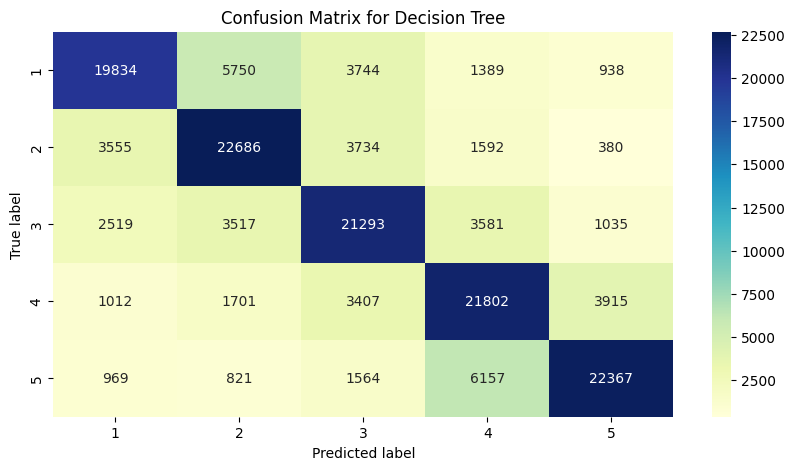

In [34]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Decision Tree')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr=lr.fit(X_train, Y_train)
score = lr.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.568158129371727


In [36]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = lr.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.568158129371727

 Clasification report:
               precision    recall  f1-score   support

           1     0.6235    0.6883    0.6543     31655
           2     0.4998    0.4691    0.4840     31947
           3     0.4750    0.4274    0.4499     31945
           4     0.5373    0.4268    0.4757     31837
           5     0.6567    0.8305    0.7334     31878

    accuracy                         0.5682    159262
   macro avg     0.5585    0.5684    0.5595    159262
weighted avg     0.5583    0.5682    0.5593    159262



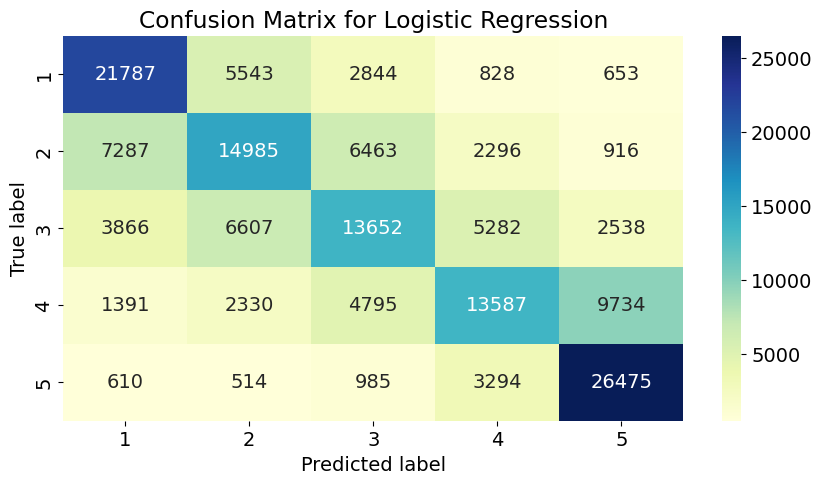

In [37]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Logistic Regression')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
 
rf= RandomForestClassifier( max_depth=60, random_state=42)
rf = rf.fit(X_train, Y_train)
score = rf.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6813238562871243


In [39]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = rf.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6813238562871243

 Clasification report:
               precision    recall  f1-score   support

           1     0.7230    0.7391    0.7309     31655
           2     0.7414    0.6646    0.7009     31947
           3     0.7460    0.6106    0.6715     31945
           4     0.6974    0.5344    0.6051     31837
           5     0.5733    0.8584    0.6875     31878

    accuracy                         0.6813    159262
   macro avg     0.6962    0.6814    0.6792    159262
weighted avg     0.6962    0.6813    0.6792    159262



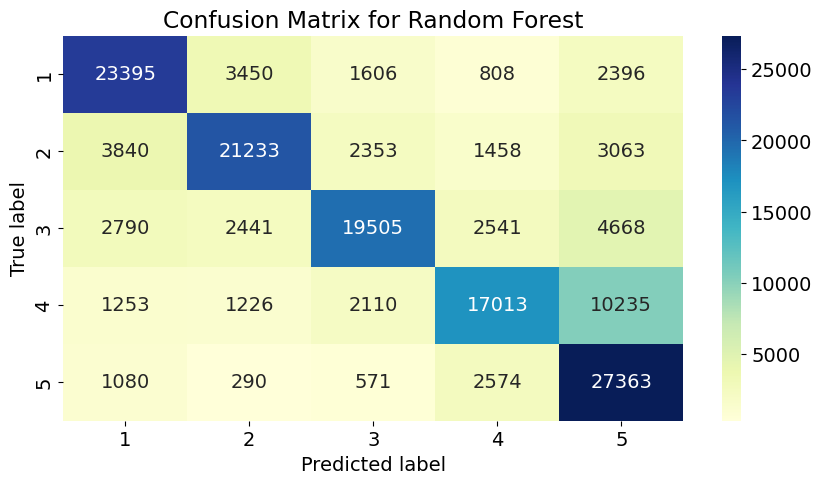

In [40]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Random Forest')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# SVM

In [41]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC()
sv= CalibratedClassifierCV(svm) 
sv = sv.fit(X_train, Y_train)  
score =sv.score(X_test, Y_test)
print("Accuracy:", score)

C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The defaul

Accuracy: 0.576264268940488


In [42]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = sv.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.576264268940488

 Clasification report:
               precision    recall  f1-score   support

           1     0.6278    0.6698    0.6481     31655
           2     0.5124    0.5037    0.5080     31947
           3     0.4971    0.4341    0.4635     31945
           4     0.5397    0.4451    0.4878     31837
           5     0.6623    0.8296    0.7365     31878

    accuracy                         0.5763    159262
   macro avg     0.5678    0.5765    0.5688    159262
weighted avg     0.5677    0.5763    0.5686    159262



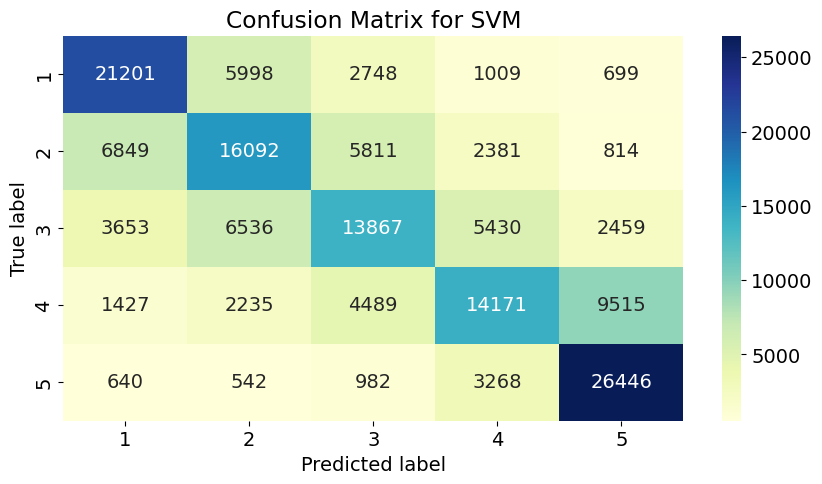

In [43]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for SVM')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Naive Bayes

In [44]:
from sklearn import model_selection, naive_bayes, svm
nb = naive_bayes.MultinomialNB(alpha=0.1)
nb = nb.fit(X_train, Y_train) 
score = nb.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.5400221019452224


In [45]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = nb.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.5400221019452224

 Clasification report:
               precision    recall  f1-score   support

           1     0.6042    0.6517    0.6270     31655
           2     0.4689    0.4135    0.4395     31947
           3     0.4507    0.4079    0.4282     31945
           4     0.4666    0.4346    0.4500     31837
           5     0.6590    0.7937    0.7201     31878

    accuracy                         0.5400    159262
   macro avg     0.5299    0.5403    0.5330    159262
weighted avg     0.5298    0.5400    0.5328    159262



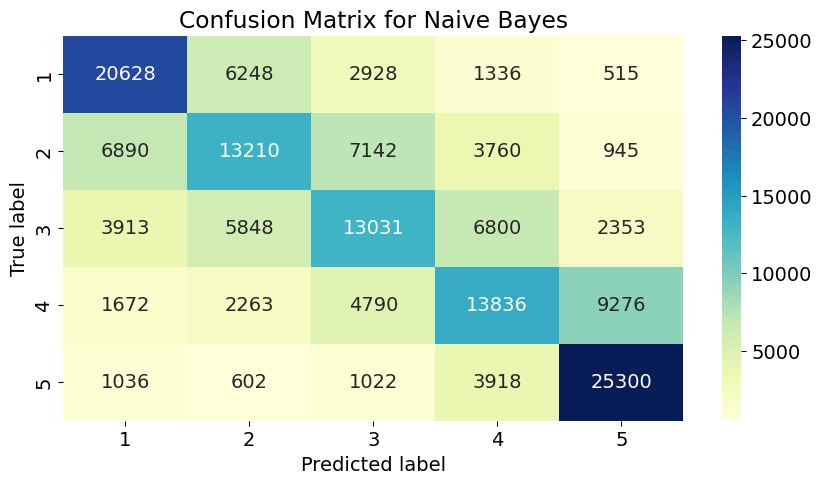

In [46]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Naive Bayes')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# XGBClassifier

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [48]:
import xgboost as xgb
model = xgb.XGBClassifier()

#Training the model on the training data
xg=model.fit(X_train, Y_train) 
score = xg.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.5310243498135149


In [49]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = xg.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.5310243498135149

 Clasification report:
               precision    recall  f1-score   support

           0     0.6158    0.6420    0.6286     31655
           1     0.4145    0.5080    0.4565     31947
           2     0.4540    0.3264    0.3798     31945
           3     0.5055    0.4002    0.4468     31837
           4     0.6383    0.7796    0.7019     31878

    accuracy                         0.5310    159262
   macro avg     0.5256    0.5312    0.5227    159262
weighted avg     0.5254    0.5310    0.5225    159262



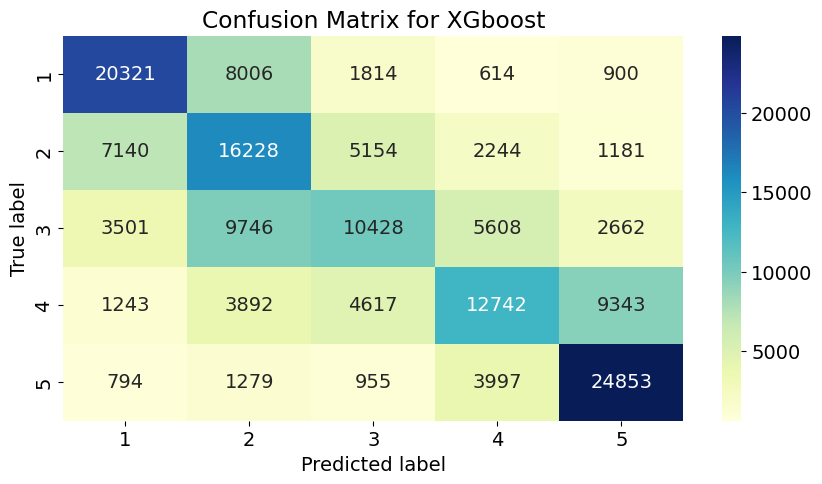

In [50]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for XGboost')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# KNN classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=10)
knn=model.fit(X_train, Y_train) 
score = knn.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.562205673669802


In [52]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = knn.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.562205673669802

 Clasification report:
               precision    recall  f1-score   support

           0     0.6257    0.5211    0.5687     31655
           1     0.5292    0.5748    0.5511     31947
           2     0.5014    0.5269    0.5138     31945
           3     0.5117    0.5487    0.5296     31837
           4     0.6683    0.6393    0.6535     31878

    accuracy                         0.5622    159262
   macro avg     0.5673    0.5622    0.5633    159262
weighted avg     0.5672    0.5622    0.5633    159262



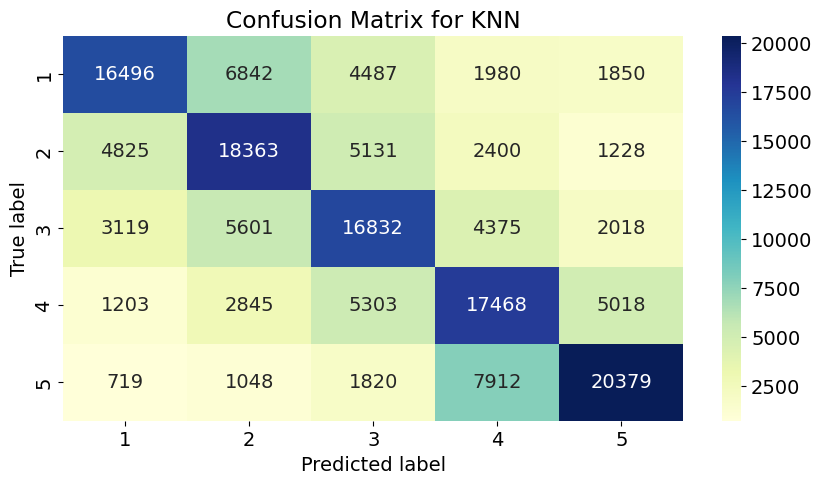

In [53]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for KNN')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()